In [1]:
import pandas as pd
import plotly
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from textblob import TextBlob  # Import TextBlob

# Read the dataset
df = pd.read_csv('Twitter_Data.csv')


In [2]:
# Drop NaN values in 'clean_text' before creating features and target variable
df = df.dropna(subset=['clean_text'])

In [3]:
# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 162976 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB
None


In [4]:
# Display the first few rows of the dataset
print(df.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [5]:
# Sentiment Analysis
df['Sentiment'] = df['clean_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)



In [6]:
# Display the updated DataFrame with the sentiment column
print(df.head())

                                          clean_text  category  Sentiment
0  when modi promised “minimum government maximum...      -1.0  -0.300000
1  talk all the nonsense and continue all the dra...       0.0   0.000000
2  what did just say vote for modi  welcome bjp t...       1.0   0.483333
3  asking his supporters prefix chowkidar their n...       1.0   0.150000
4  answer who among these the most powerful world...       1.0   0.400000


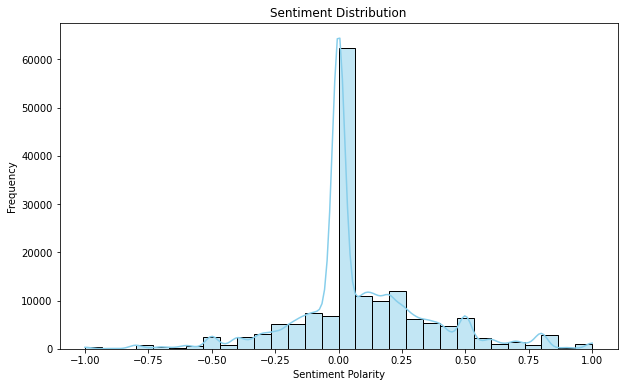

In [7]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


<ipython-input-8-3b16b30a0d73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='Sentiment', data=df, palette='viridis')


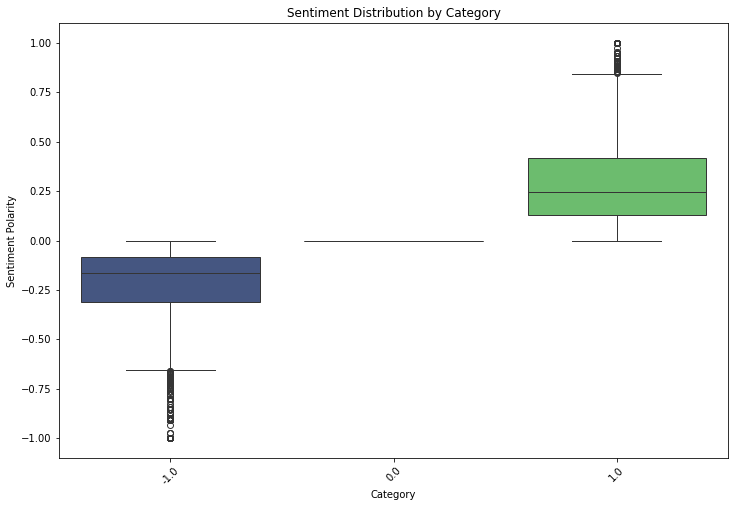

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45)
plt.show()


In [9]:
# Machine Learning Algorithms (Optional)
X = df['clean_text']
y = df['category']

# Drop NaN values from 'X' and 'y'
df_ml = df.dropna(subset=['clean_text', 'category'])
X = df_ml['clean_text']
y = df_ml['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)



In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier_rf.fit(X_train_vectorized, y_train)

# Evaluate the Random Forest classifier
accuracy_rf = classifier_rf.score(X_test_vectorized, y_test)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')


Random Forest Accuracy: 82.52%


<ipython-input-11-2131c9705877>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='Set2')


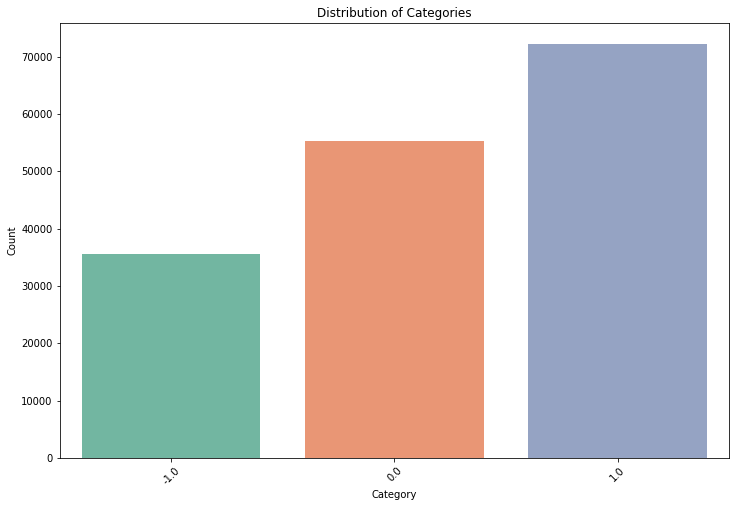

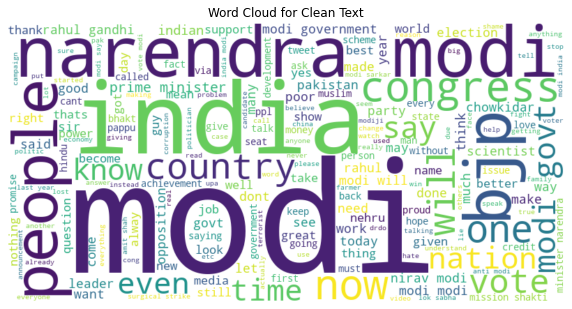

<ipython-input-11-2131c9705877>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_feature_importance, palette='viridis')


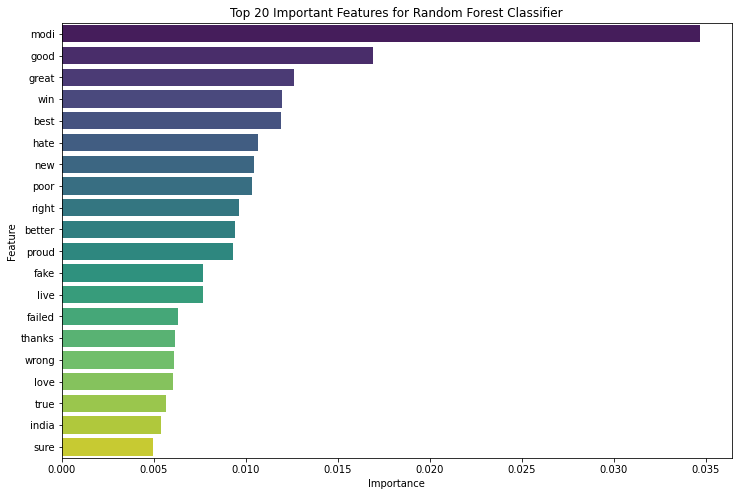

In [11]:
# Additional Data Visualization
plt.figure(figsize=(12, 8))
sns.countplot(x='category', data=df, palette='Set2')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Word Cloud for Clean Text
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df['clean_text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Clean Text')
plt.axis('off')
plt.show()

# Feature Importance Plot for Random Forest
feature_importances = classifier_rf.feature_importances_
feature_names = vectorizer.get_feature_names_out()

df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_feature_importance, palette='viridis')
plt.title('Top 20 Important Features for Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


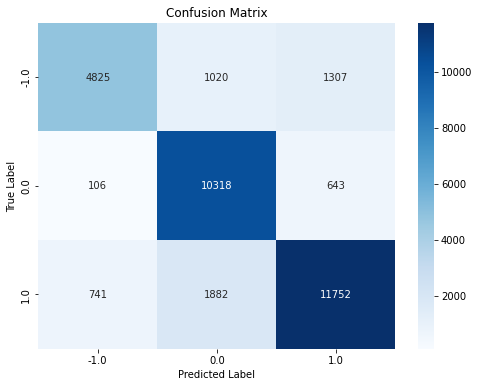

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred = classifier_rf.predict(X_test_vectorized)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier_rf.classes_, yticklabels=classifier_rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




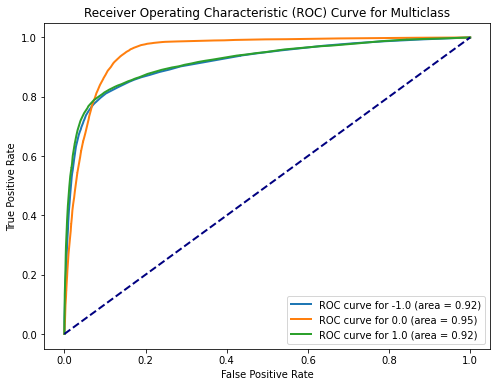

In [15]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
y_probs = classifier_rf.predict_proba(X_test_vectorized)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classifier_rf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == classifier_rf.classes_[i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(classifier_rf.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for {classifier_rf.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()


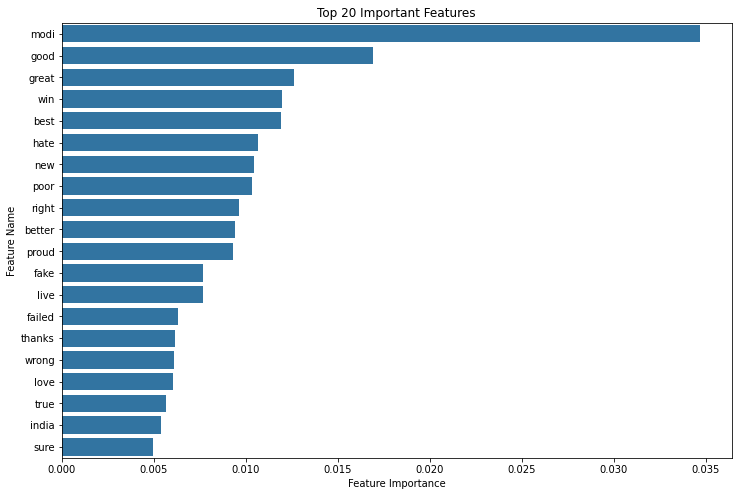

In [18]:
if hasattr(classifier_rf, 'feature_importances_'):
    feature_importance = classifier_rf.feature_importances_

    # Sort feature importance in descending order
    sorted_idx = feature_importance.argsort()[::-1]

    # Select the top 20 features
    top_features = vectorizer.get_feature_names_out()[sorted_idx][:20]
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importance[sorted_idx][:20], y=top_features)
    plt.title('Top 20 Important Features')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    plt.show()
